<a href="https://colab.research.google.com/github/sandeepPRL/Financial_calculator/blob/master/urban_sound_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline


from scipy.io import wavfile
from keras.layers import Conv2D, MaxPool2D, Flatten, LSTM
from keras.layers import Dropout, Dense, TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
from python_speech_features import mfcc


In [0]:
from google.colab import files
uploaded = files.upload()


Saving 0.wav to 0 (3).wav
Saving 1.wav to 1 (1).wav
Saving 2.wav to 2 (1).wav
Saving 3.wav to 3 (1).wav
Saving 4.wav to 4 (2).wav
Saving 6.wav to 6 (2).wav
Saving 10.wav to 10 (1).wav
Saving 11.wav to 11.wav
Saving 12.wav to 12 (1).wav
Saving 15.wav to 15 (2).wav
Saving 17.wav to 17 (2).wav
Saving 18.wav to 18 (1).wav
Saving 19.wav to 19 (1).wav
Saving 20.wav to 20 (1).wav
Saving 22.wav to 22 (1).wav
Saving 24.wav to 24 (1).wav
Saving 26.wav to 26 (1).wav
Saving 27.wav to 27 (1).wav
Saving 32.wav to 32 (1).wav
Saving 33.wav to 33.wav
Saving 35.wav to 35.wav
Saving 36.wav to 36.wav
Saving 37.wav to 37.wav
Saving 38.wav to 38.wav
Saving 40.wav to 40.wav


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


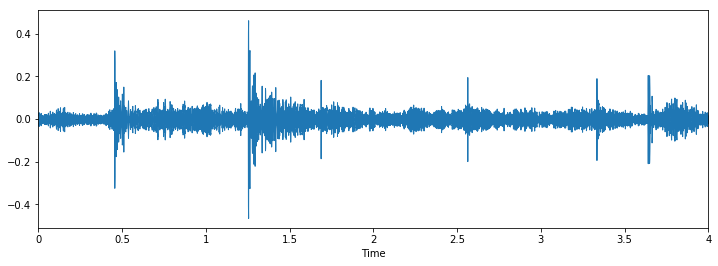

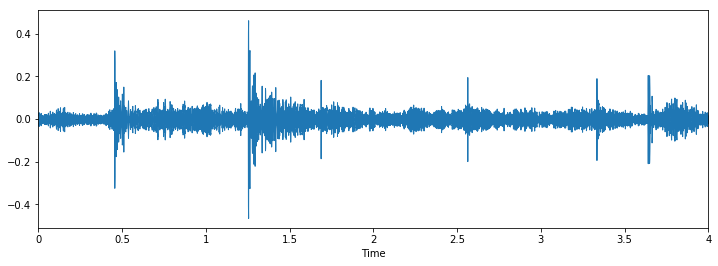

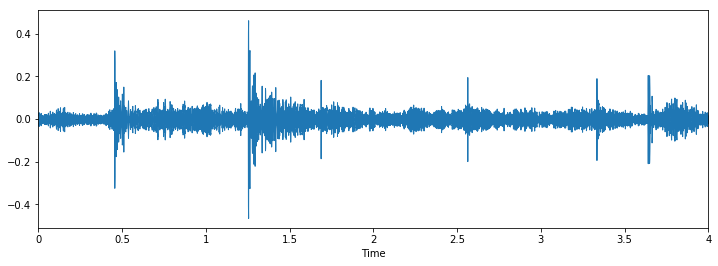

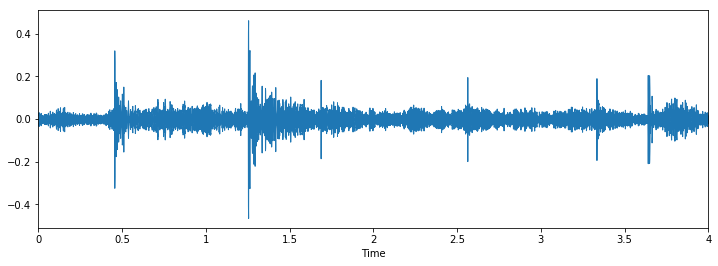

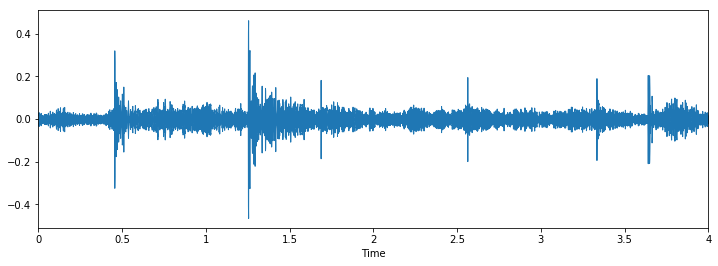

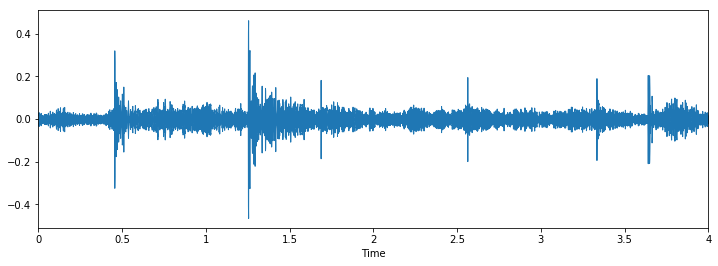

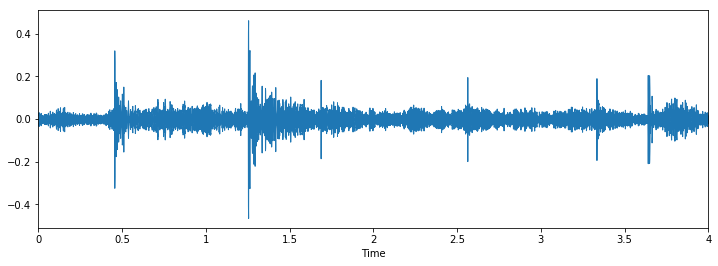

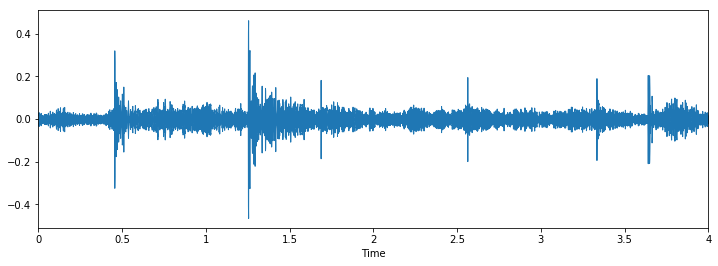

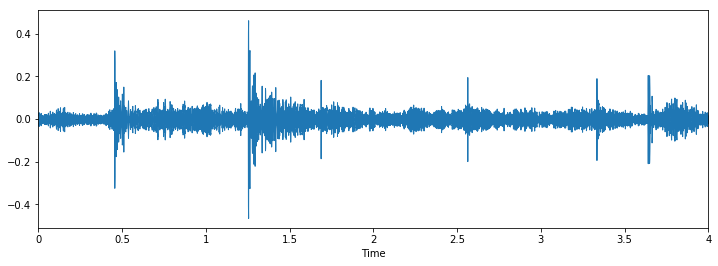

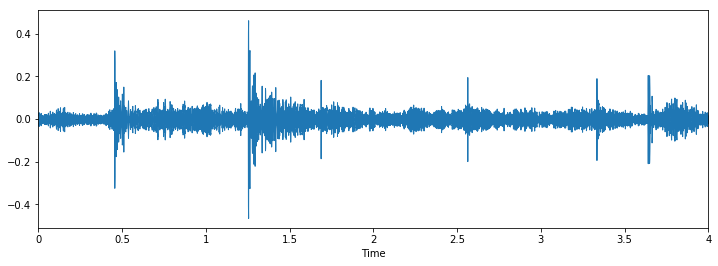

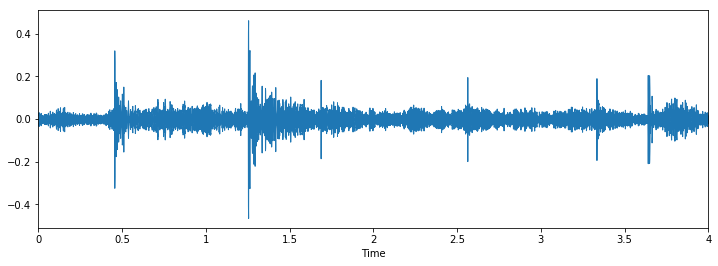

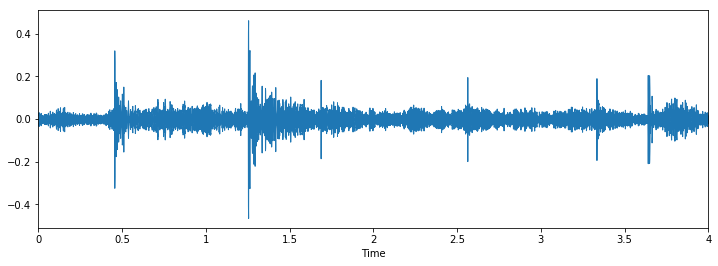

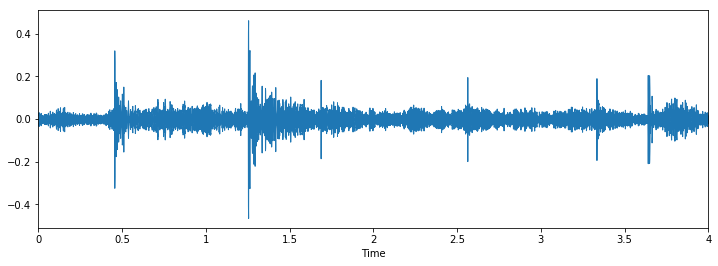

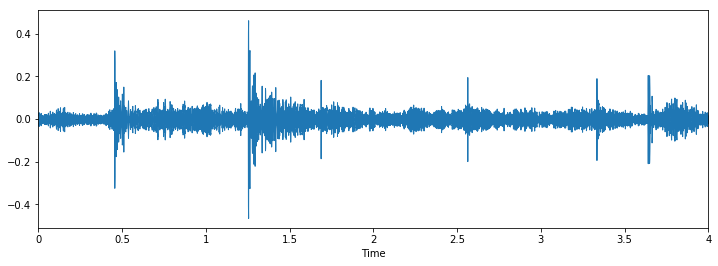

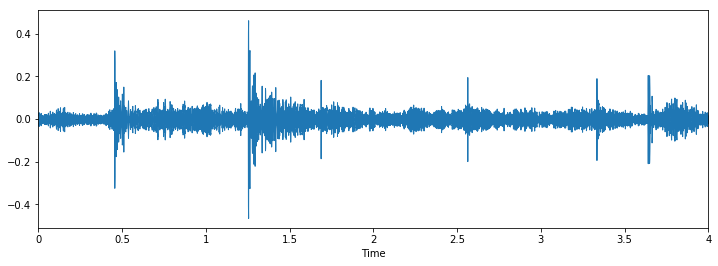

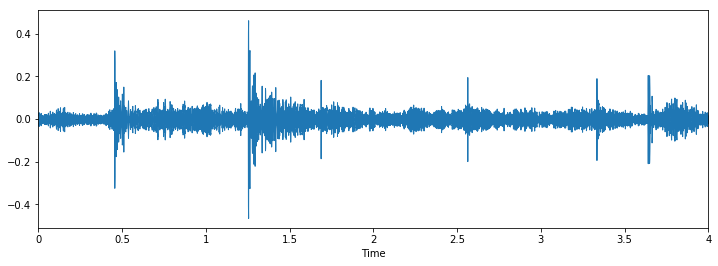

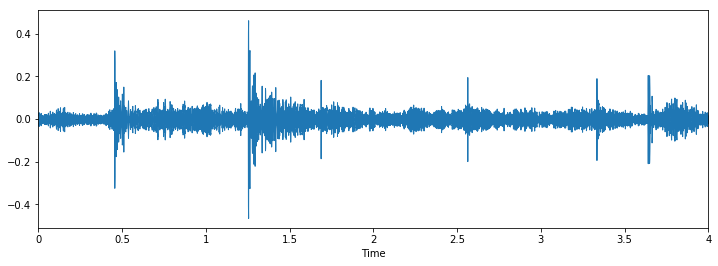

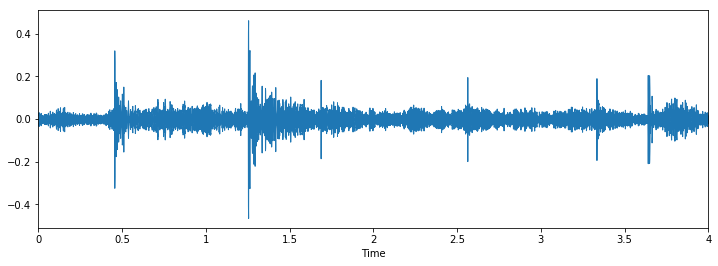

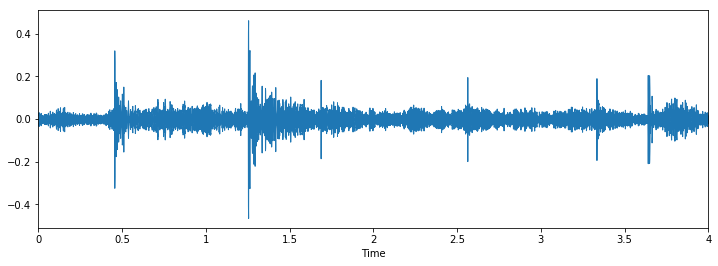

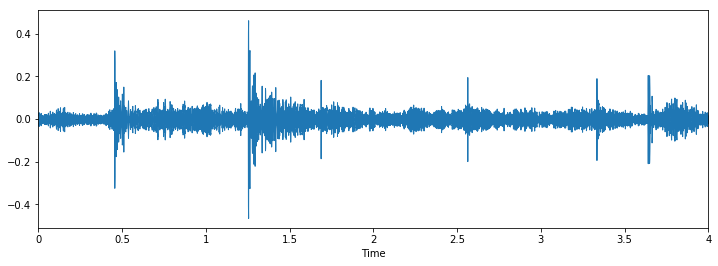

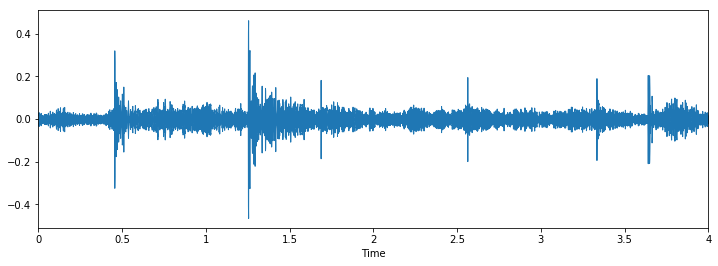

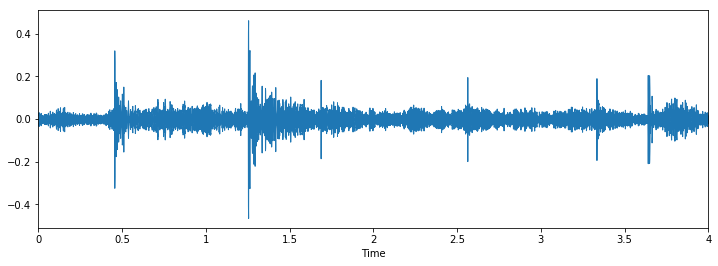

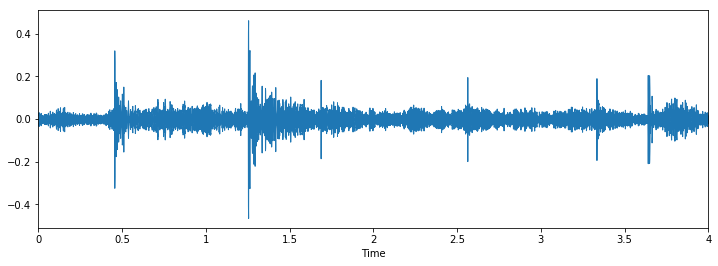

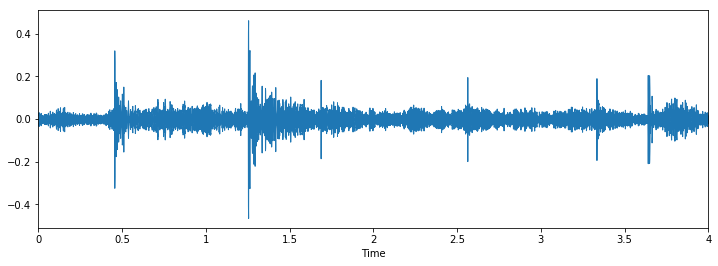

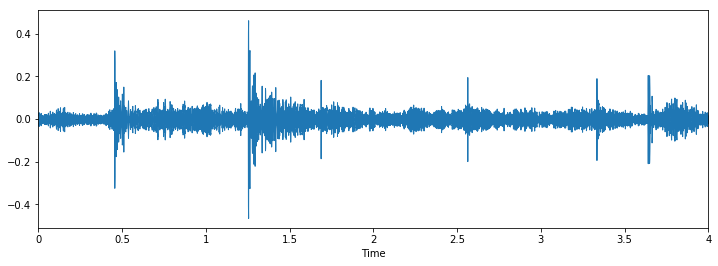

In [0]:
import IPython.display as ipd
import os
import pandas as pd
import librosa
import glob 
from google.colab import files
lis = []
#lis=['12.wav','15.wav']
uploaded = files.upload()
for i in uploaded:
  lis.append(i)
    

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


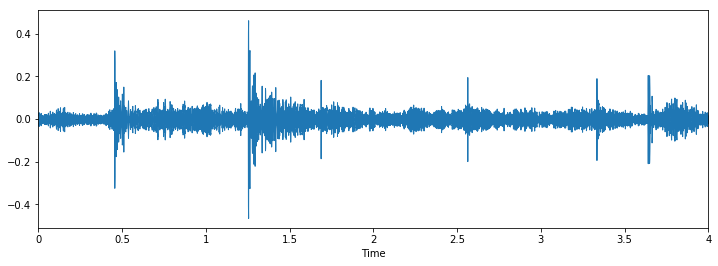

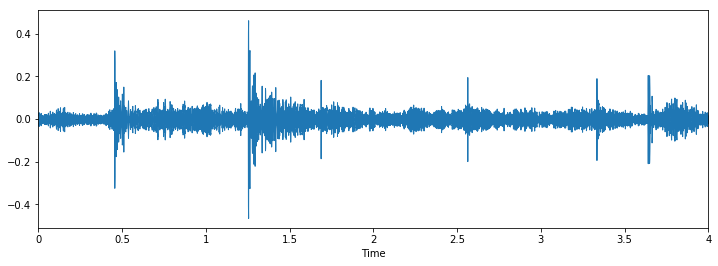

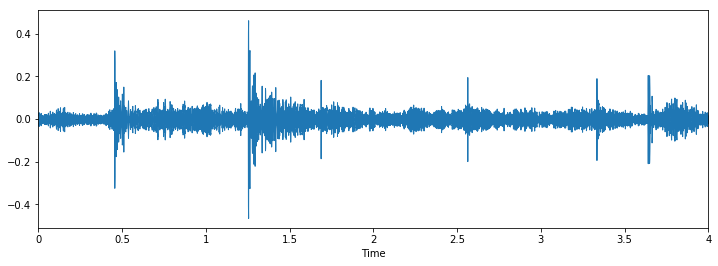

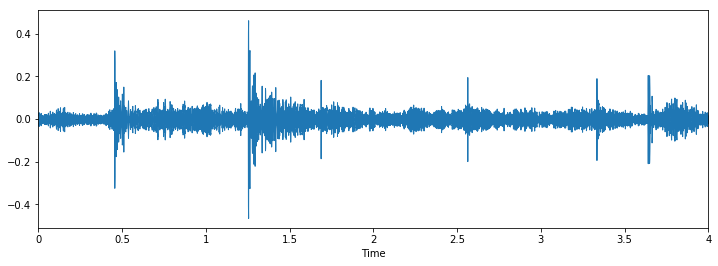

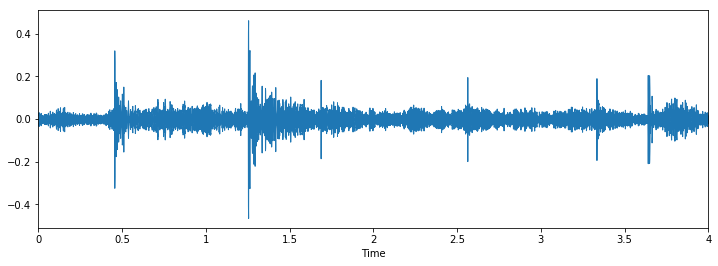

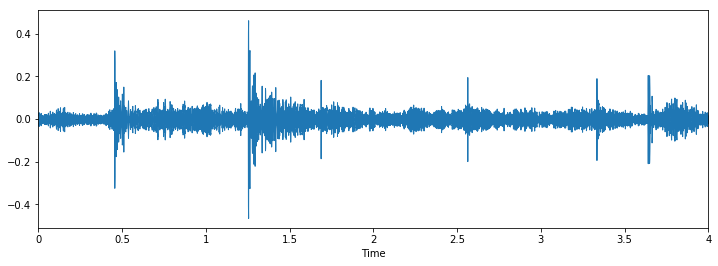

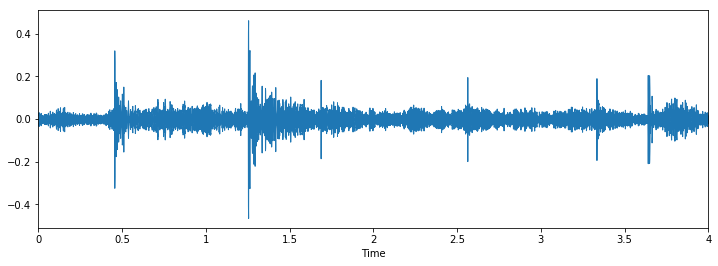

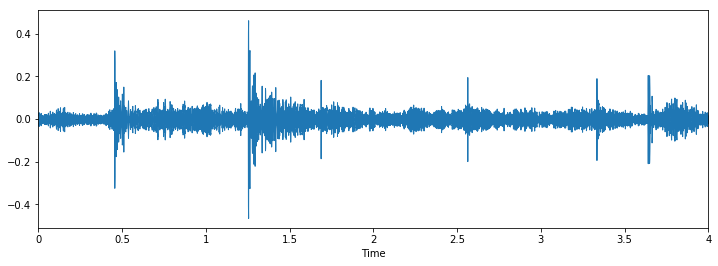

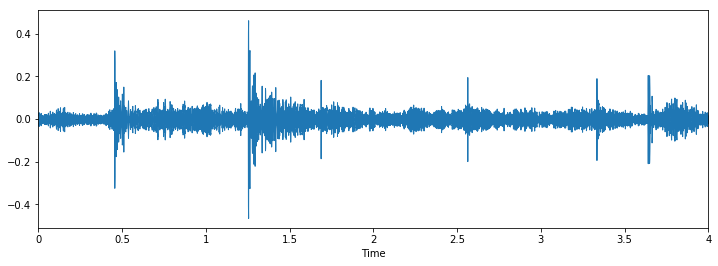

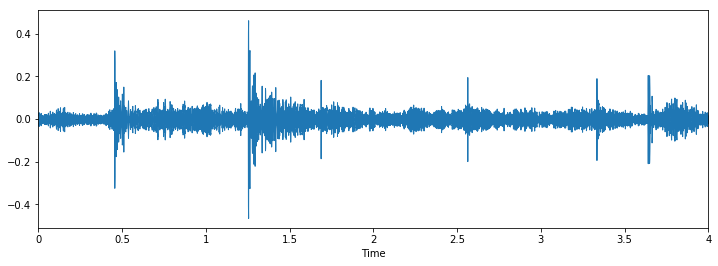

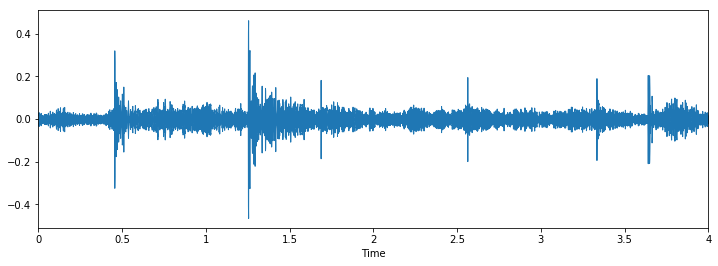

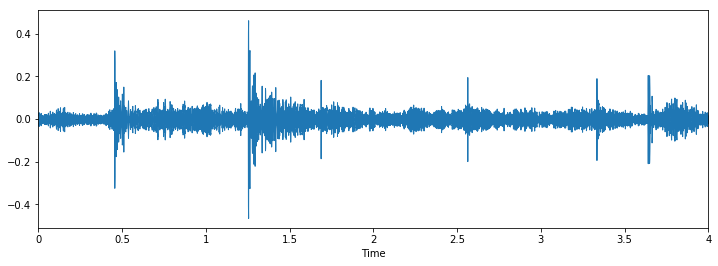

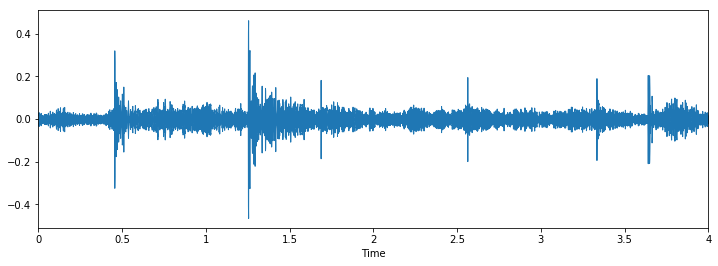

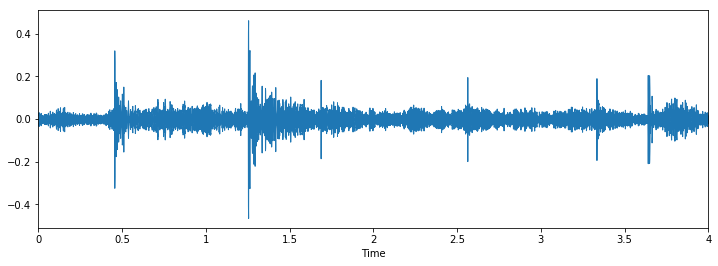

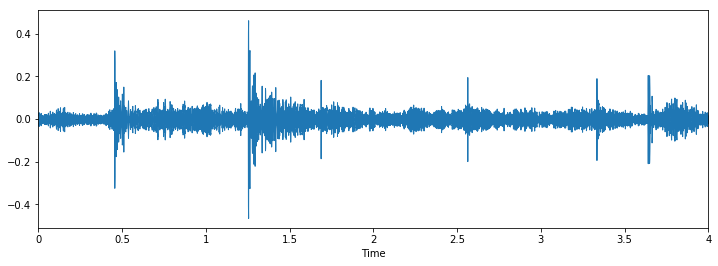

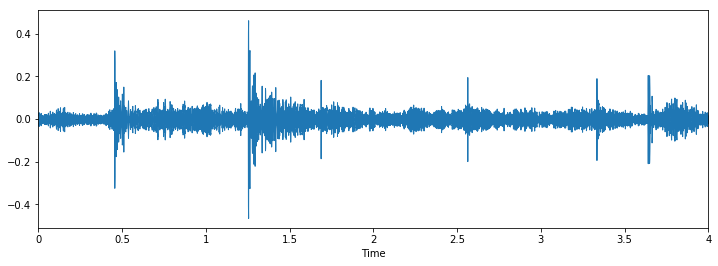

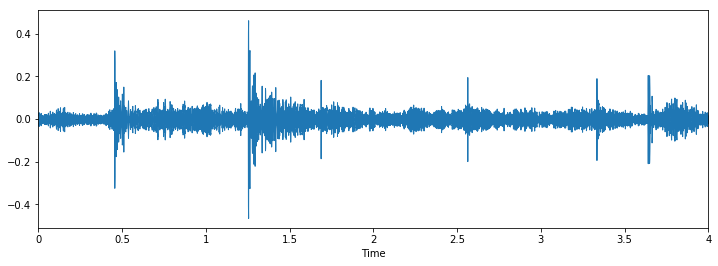

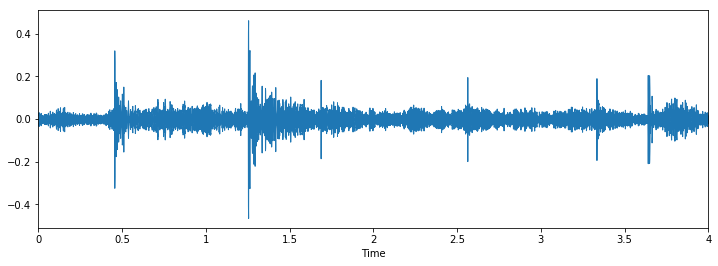

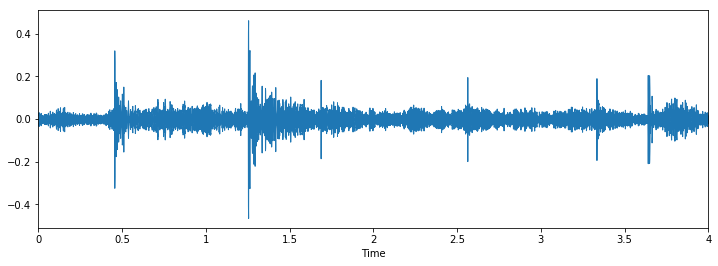

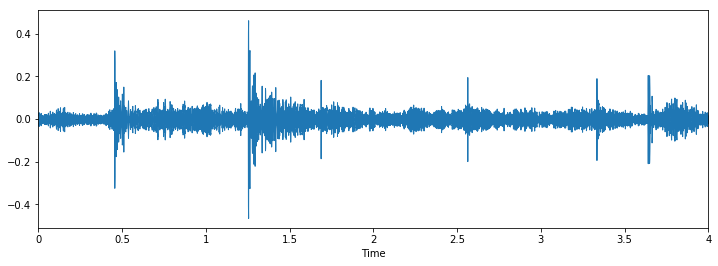

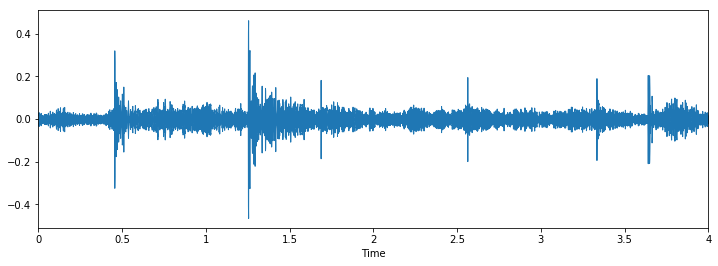

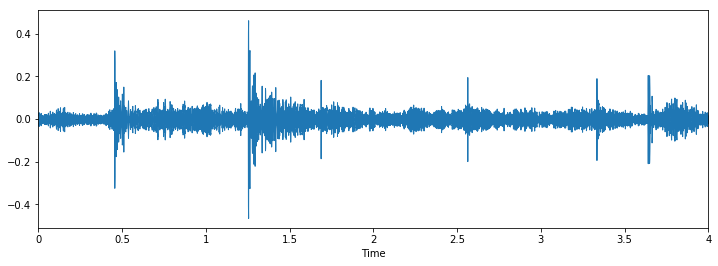

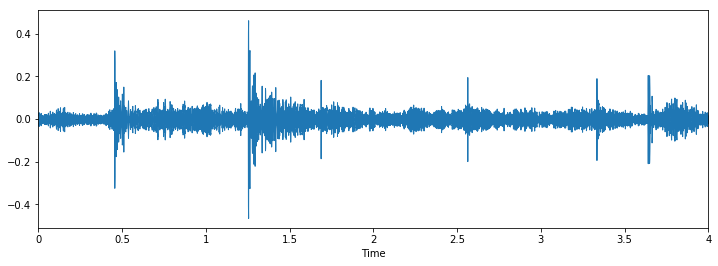

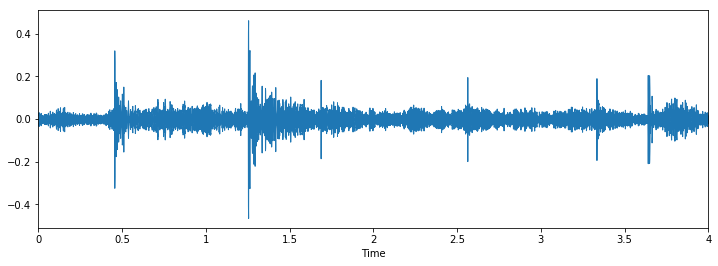

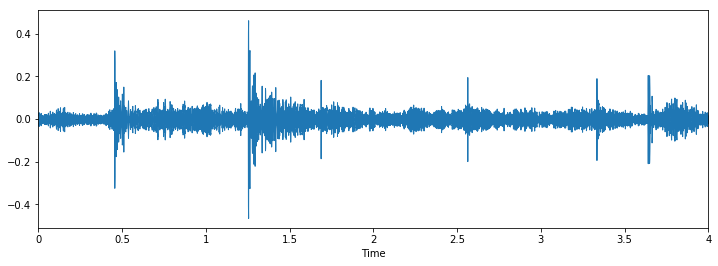

In [0]:
for i in lis:
    ipd.Audio(i)
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(data, sr=sampling_rate)
  

In [0]:
print(lis)

['4.wav', '6.wav']


In [0]:
from google.colab import files
uploaded = files.upload()
train = pd.read_csv('train.csv')

Saving train.csv to train.csv


In [0]:
from google.colab import files
uploaded = files.upload()
test = pd.read_csv('test.csv')


In [0]:
#X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
def parser(row):
  for i in lis:
    data, sampling_rate = librosa.load(i,res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T,axis=0) 

    feature = mfccs
    label = row.Class
    return [feature, label]


In [0]:
temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']

In [0]:
X = []
y = []
for i in temp:
  X.append(np.array(i[0]))
  y.append(np.array(i[-1]))
  
#  y = 
  #temp = np.array([np.array(i)])


In [0]:
X

[array([-2.37926479e+02,  1.35902461e+02,  3.92684403e+01,  2.12402387e+01,
         9.53132848e+00,  1.38851206e+01, -3.99444661e+00,  1.24814870e+01,
        -2.60462664e+00,  6.07091558e+00,  2.23836723e+00,  4.17497228e+00,
        -1.90301314e+00,  2.30779460e+00, -2.66080009e+00, -6.64915491e-01,
         4.49824368e+00,  3.77204298e+00,  3.37126391e+00,  1.59958680e+00,
        -5.34918903e-01, -1.95140379e-01,  6.27361166e-01,  3.20973300e+00,
         1.33894133e+00,  1.04329816e-01,  9.07274421e-01, -2.27093950e+00,
        -5.29897600e-01,  2.00067343e-01,  5.41832293e-01, -3.01083238e-01,
         5.31196471e-01, -5.16148851e-01,  1.73844662e+00,  1.10963680e+00,
         2.75794074e+00,  2.15940254e+00,  6.26566792e-01,  6.92017477e-01]),
 array([-2.37926479e+02,  1.35902461e+02,  3.92684403e+01,  2.12402387e+01,
         9.53132848e+00,  1.38851206e+01, -3.99444661e+00,  1.24814870e+01,
        -2.60462664e+00,  6.07091558e+00,  2.23836723e+00,  4.17497228e+00,
        -1

In [0]:
len(X)

5435

In [0]:
X = numpy.stack(X, axis=0 )

In [0]:
len(X)

5435

In [0]:
len(y)

5435

In [0]:
test.head(20)

In [0]:
from sklearn.preprocessing import LabelEncoder
import keras.utils
from keras import utils as np_utils
lb = LabelEncoder()
y = np_utils.to_categorical(lb.fit_transform(y))

In [0]:
y


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [0]:
num_labels = y.shape[1]


In [0]:
num_labels

10

In [0]:

filter_size = 2
model = Sequential()
model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
model.fit(X, y, batch_size=60, epochs=50)

Epoch 1/50
5435/5435 [==============================] - 0s 66us/step - loss: 2.2642 - acc: 0.1225
Epoch 2/50
5435/5435 [==============================] - 0s 66us/step - loss: 2.2634 - acc: 0.1229
Epoch 3/50
5435/5435 [==============================] - 0s 66us/step - loss: 2.2636 - acc: 0.1229
Epoch 4/50
5435/5435 [==============================] - 0s 66us/step - loss: 2.2631 - acc: 0.1227
Epoch 5/50
5435/5435 [==============================] - 0s 67us/step - loss: 2.2637 - acc: 0.1229
Epoch 6/50
5435/5435 [==============================] - 0s 67us/step - loss: 2.2641 - acc: 0.1229
Epoch 7/50
5435/5435 [==============================] - 0s 70us/step - loss: 2.2638 - acc: 0.1229
Epoch 8/50
5435/5435 [==============================] - 0s 65us/step - loss: 2.2640 - acc: 0.1229
Epoch 9/50
5435/5435 [==============================] - 0s 66us/step - loss: 2.2635 - acc: 0.1229
Epoch 10/50
5435/5435 [==============================] - 0s 66us/step - loss: 2.2639 - acc: 0.1229
Epoch 11/50
5435/54